<a href="https://colab.research.google.com/github/RoSchilling/ML_Analise_dataset_adult/blob/main/ML_data_set_adult_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import warnings
warnings.filterwarnings('ignore')

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.impute import SimpleImputer # Adicionar valores ao missing

In [90]:
# Importando dataset do github
url = 'https://raw.githubusercontent.com/RoSchilling/ML_Analise_dataset_adult/main/adult.csv'

df = pd.read_csv(url, sep =";")

I) Avaliando o data set

In [58]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [59]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


II) Avaliando valores nulos do df

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [62]:
# Criando o loop para avaliar a quantidade de dados distintos
for columns in df.columns:
  num_distinct = len(df[columns].unique())
  print(f"{columns}: {num_distinct} valores distintos")


age: 73 valores distintos
workclass: 9 valores distintos
fnlwgt: 21648 valores distintos
education: 16 valores distintos
education-num: 16 valores distintos
marital-status: 7 valores distintos
occupation: 15 valores distintos
relationship: 6 valores distintos
race: 5 valores distintos
sex: 2 valores distintos
capital-gain: 119 valores distintos
capital-loss: 92 valores distintos
hours-per-week: 94 valores distintos
native-country: 42 valores distintos
class: 2 valores distintos


In [106]:
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

IV) Preparando os dados

In [107]:
# copiando os dados
df_ml = df.copy()

# Adicionando a variável target
df_ml['target'] = np.where(df_ml['class'] == " <=50K",1,0)

# selecionando apenas os dados númericos
df_ml = df_ml.select_dtypes(include='int')


In [109]:
# verificando
df_ml.tail()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target
32556,27,257302,12,0,0,38,1
32557,40,154374,9,0,0,40,0
32558,58,151910,9,0,0,40,1
32559,22,201490,9,0,0,20,1
32560,52,287927,9,15024,0,40,0


IV) Visualizando o dados

<Axes: >

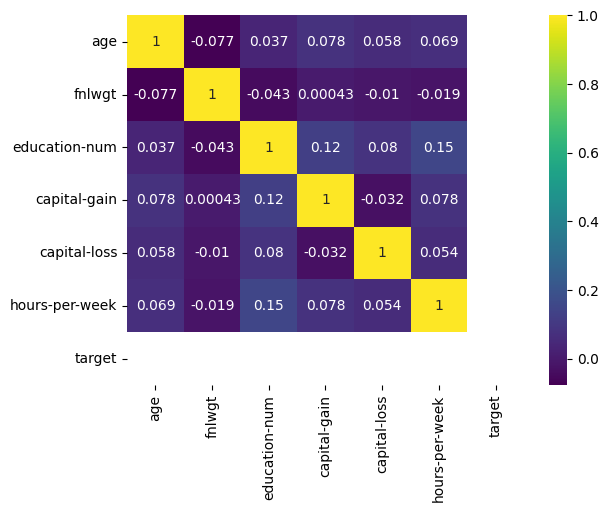

In [94]:
# Avaliando a correlação das variáveis
sns.heatmap(df_ml.corr(), annot=True, cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

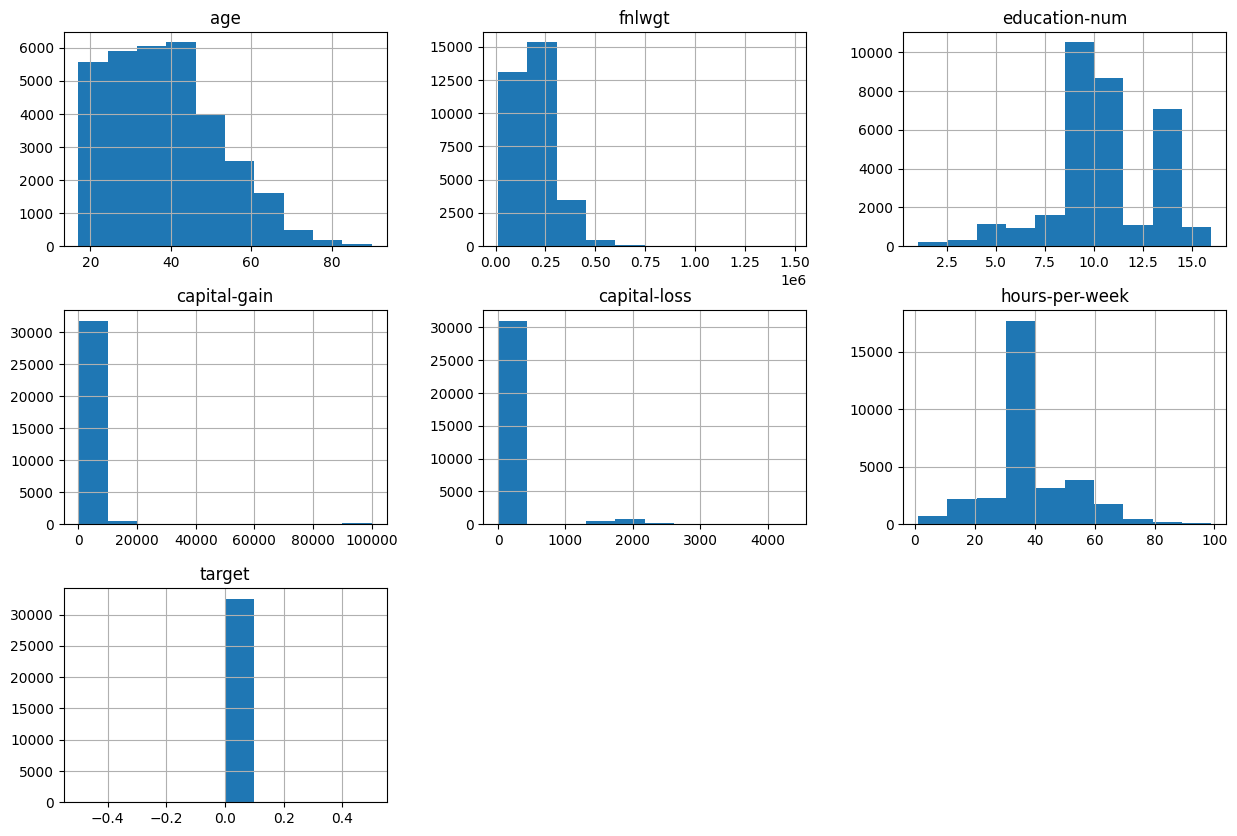

In [95]:
# Avaliando a frequência das variáveis
df_ml.hist(figsize = (15,10))
plt.show

IV) Preparando dados para treinos

In [110]:
# Separação de base de treino e base de teste
array = df_ml.values
X = array[:,0:6] # atributos
y = array[:,6] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) # faz a divisão

# Criando folds para validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # realizando o particionamento em 10 folds


KNN: 0.776605 (0.005966)
CART: 0.771346 (0.008245)
NB: 0.794456 (0.007170)
SVM: 0.794572 (0.007484)


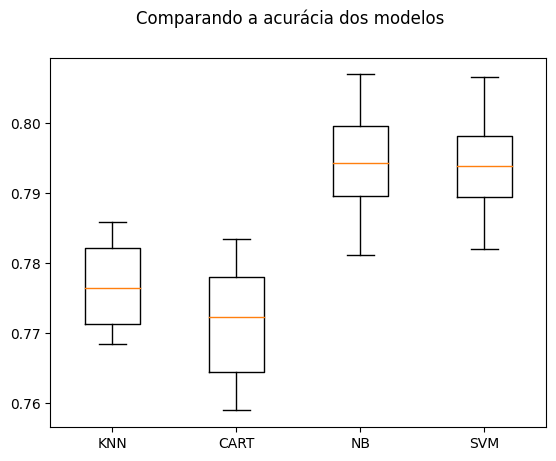

In [111]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Lista para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os a lista dos modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig=plt.figure()
fig.suptitle('Comparando a acurácia dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [113]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.7925687087363734
